### An introduction to the Pinecone vector database.

Pinecone makes it easy to build high-performance vector search applications. It’s a managed, cloud-native vector database with a simple API and no infrastructure hassles.

### Use cases
Pinecone is useful for a broad variety of applications. The following are some of the most common:

- Semantic text search: Convert text data into vector embeddings using an NLP transformer such as a sentence embedding model, then index and search through those vectors using Pinecone.
- Generative question-answering: Retrieve relevant contexts to queries from Pinecone and pass these to a generative model like OpenAI to generate an answer backed by real data sources.
- Hybrid search: Perform semantic and keyword search over your data in one query and combine the results for more relevant results.
- Image similarity search: Transform image data into vector embeddings and build an index with Pinecone. Then convert query images into vectors and retrieve similar images.
- Product recommendations: Generate product recommendations for ecommerce based on vectors representing users.

Installing pinecone:
pip install pinecone-client

**Importing pinecone**

In [1]:
import pinecone

D:\Users\mduklan\python\venv\lib\site-packages\pinecone\index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


After login to pinecone you will find apikey in APIkeys tab of website
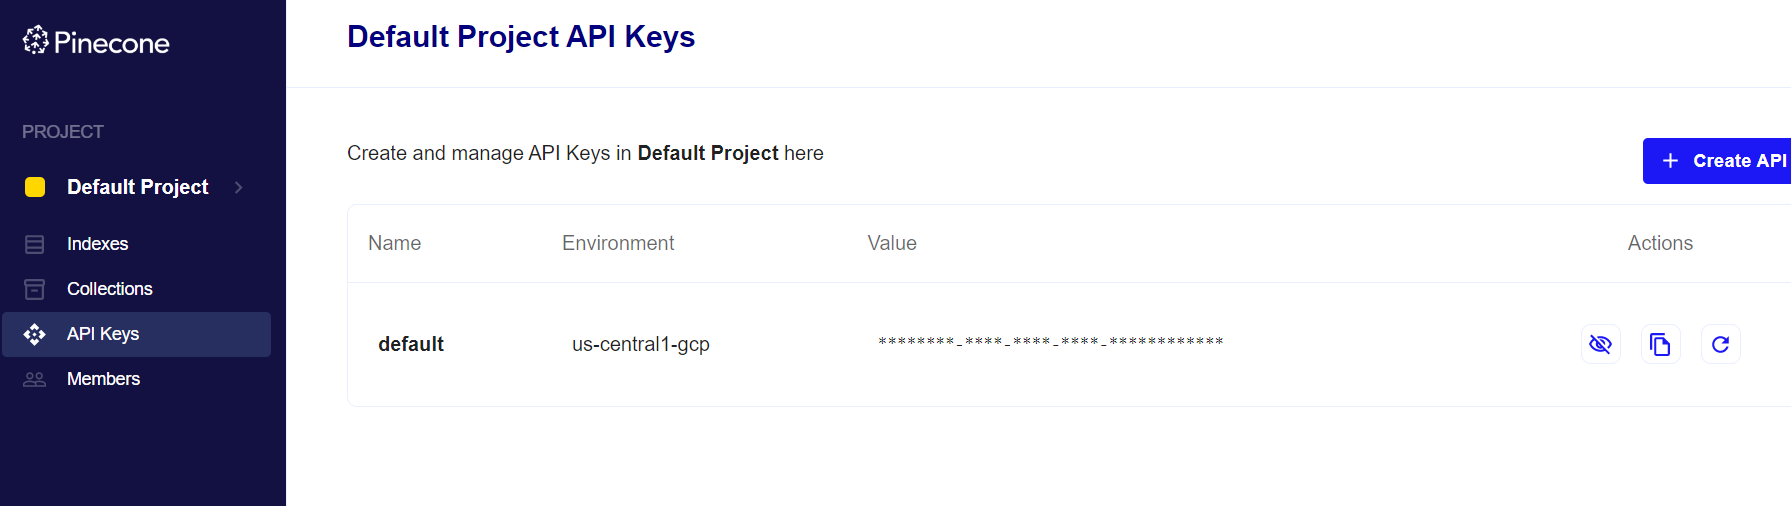
**Initializing pinecone**

In [2]:
pinecone.init(api_key="b7c1ee1a-c2e2-4e1a-__________", environment="us-central1-gcp")

**Create an index**

An index is the highest-level organizational unit of vector data in Pinecone. It accepts and stores vectors, serves queries over the vectors it contains, and does other vector operations over its contents.

The commands below create an index named "quickstart" that performs approximate nearest-neighbor search using the Euclidean distance metric for 8-dimensional vectors.

In [3]:
pinecone.create_index("quickstart", dimension=8, metric="euclidean")

After running above command we can visit website and see project
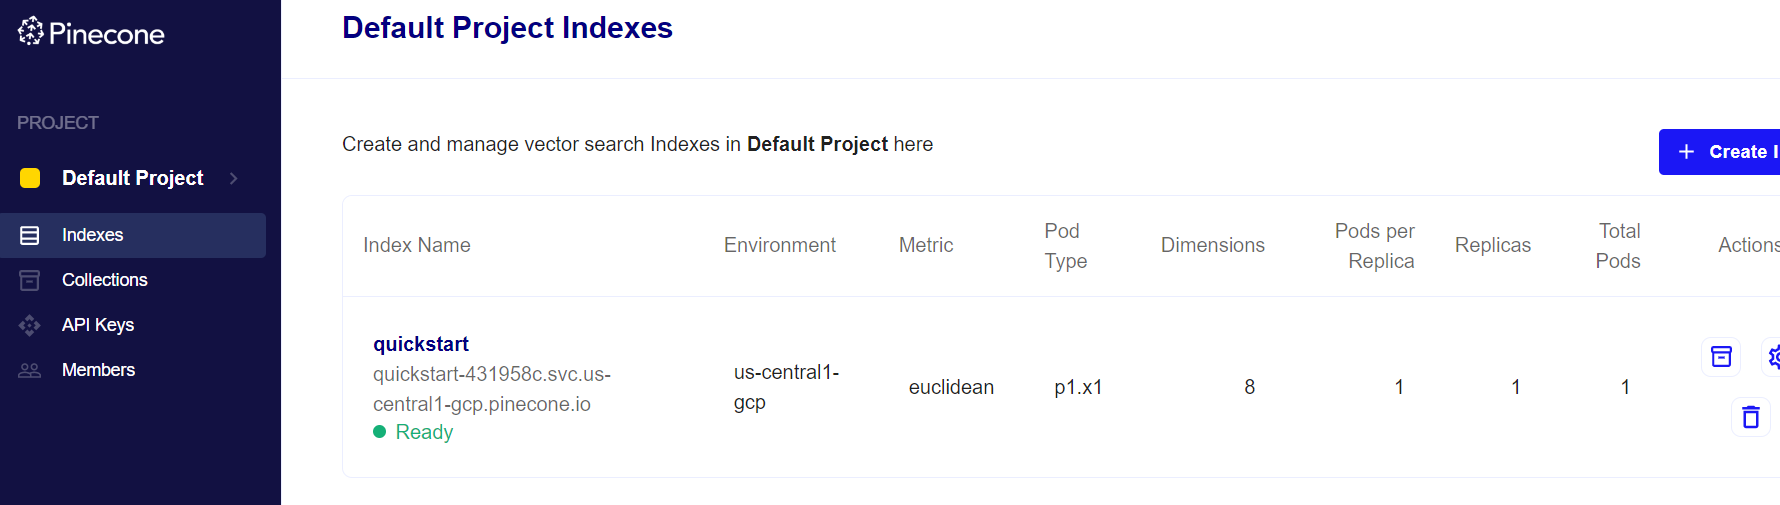

**Retrieve a list of your indexes**

In [7]:
print("Indexes in db:", " ".join(pinecone.list_indexes()))

Indexes in db: quickstart


**Connect to the index (Client only)**

Before you can query your index using a client, you must connect to the index.


In [8]:
index = pinecone.Index("quickstart")

**Insert the data**

To ingest vectors into your index, use the upsert operation.

The upsert operation inserts a new vector in the index or updates the vector if a vector with the same ID is already present.

The following commands upsert 5 8-dimensional vectors into your index.

In [13]:
index.upsert([
    ("A", [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]),
    ("B", [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]),
    ("C", [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]),
    ("D", [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]),
    ("E", [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
])

# ID: value

{'upserted_count': 5}

If a new value is upserted for an existing vector id, it will overwrite the previous value.
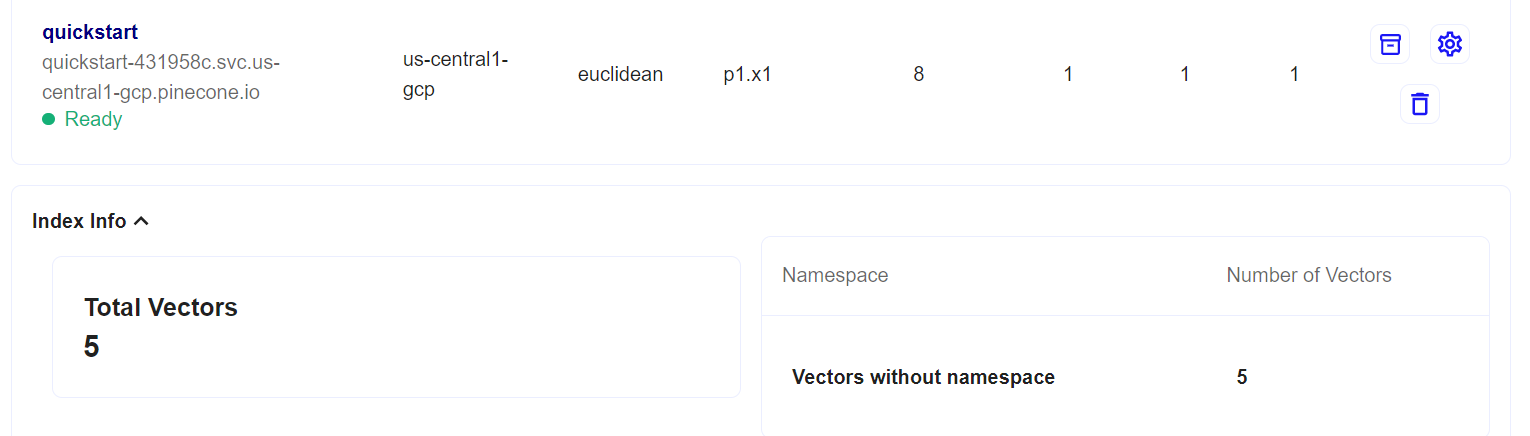

**Get statistics about your index**

In [15]:
index.describe_index_stats()

{'dimension': 8,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 5}},
 'total_vector_count': 5}

**Query the index and get similar vectors**

In [17]:
index.query(
    vector=[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
    top_k=3,
    include_values=True
)

{'matches': [{'id': 'C',
              'score': 0.0,
              'values': [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]},
             {'id': 'D',
              'score': 0.0799999237,
              'values': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]},
             {'id': 'B',
              'score': 0.0800000429,
              'values': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]}],
 'namespace': ''}

**Delete the index**

In [18]:
pinecone.delete_index("quickstart")

In [19]:
pinecone.list_indexes()

[]

### Function used

- pinecone.init(api_key, environment)
- pinecone.create_index(name, dimention, metric)
- pinecone.list_indexes()
- pinecone.Index(index_name)
- index.upsert({key, value})
- index.describe_index_stats()
- index.query(vector, top_k)
- pinecone.delete_index(name)